In [6]:
from jax import grad, vmap, jit
from jax import make_jaxpr
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Differentiation
The derivative of a function in jax is obtained by applying the `grad` function to the original function.
The result of this is a new function that can be evaluated for a choice of x.

∇f(0) is 1.0


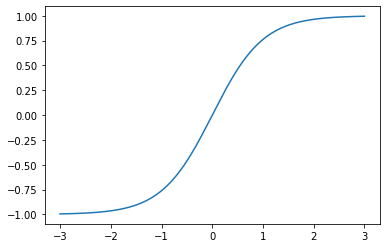

In [7]:
def f(x):
    return jnp.tanh(x)

dfdx = grad(f)
x = jnp.arange(-3.0, 3.0, 0.001)

fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x)")

print(f"∇f(0) is {grad(f)(0.0)}")

Under the hood the `grad` function creates a new function. 
The first time this function is evaluated with an input, a placeholder value that records all the mathematical operations carried out in the function body.
The operations are recorded in `jaxpr` format, that can be viewed using the `make_jaxpr` function.

In [22]:
print(make_jaxpr(f)(0.0))
print(make_jaxpr(grad(f))(0.0))

{ lambda ; a:f32[]. let b:f32[] = tanh a in (b,) }
{ lambda ; a:f32[]. let
    b:f32[] = tanh a
    c:f32[] = sub 1.0 b
    d:f32[] = mul 1.0 c
    e:f32[] = mul d b
    f:f32[] = add_any d e
  in (f,) }


Evaluating the grad function with a vector of values gives us an error since the gradient is only defined for scalar valued functions.

In [15]:
grad(f)(x)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (6000,).

# Automatic vectorization 
Code written in Numpy often relies on the reshaping arrays to leverage broadcasting rules in order for the code to run on several stacked inputs at once.
The benefit is that the code typically runs much faster than iterating over the leading dimension using a for loop in Python.
The drawback of this is that the implementation of a batched function is much harder to understand than the elementwise version.



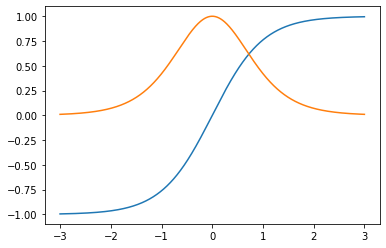

In [18]:
plt.plot(x,f(x))
plt.plot(x,vmap(grad(f))(x))

Inspecting the `jaxpr` we see that the vmap has created a specialized version of the function that takes as an argument.

In [29]:
print(make_jaxpr(vmap(grad(f)))(x))

{ lambda ; a:f32[6000]. let
    b:f32[6000] = tanh a
    c:f32[6000] = sub 1.0 b
    d:f32[6000] = mul 1.0 c
    e:f32[6000] = mul d b
    f:f32[6000] = add_any d e
  in (f,) }


# Regression example

Consider the following regression 1-D regression problem
$
y(x) = a x + b + \epsilon
$
where $\epsilon \sim \mathcal{N}(0,1)$

Using Jax we will estimate the parameters $a$ and $b$ from the data.

Text(0, 0.5, 'f(x)')

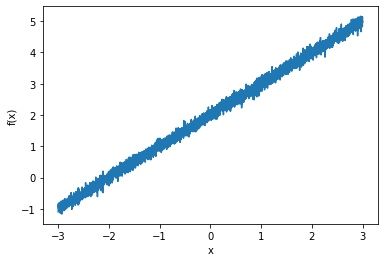

In [39]:
from jax import random
key = random.PRNGKey(1)

a = 1.0
b = 2.0

e = random.normal(key,x.shape)*1e-1
y = a*x + b + e
fig, ax = plt.subplots()

ax.plot(x,y)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")